# Only consider "helpful" alters and focus on the alters who meet up with ego on at least 2 distinct co-locations

In [2]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import meetup_strategy as ms
import time 
import pickle

In [48]:
user_meetup_details = pd.read_csv('results/user-meetup-all-None-UM1-sorted.csv')

In [49]:
user_info = user_meetup_details[['Included Rank','userid_y', 'CCE_alters', 'CCE_ego_alters', 'Pi_alters', 'Pi_ego_alters', 
                                 'LZ_entropy', 'Pi', 'n_meetupers_x', 'n_meetupers_y', 'userid_x']]

In [50]:
user_info = user_info.rename({'Included Rank': 'Included', 
                              'userid_x': 'userid',
                             'Pi': 'Pi_ego'}, axis=1)
user_info

,Included,userid_y,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,LZ_entropy,Pi_ego,n_meetupers_x,n_meetupers_y,userid
0,1,manabu-tanaka,6.275871,3.926596,0.064546,0.537732,3.965021,0.531858,8,8,00-a
1,2,atknktn,5.362886,4.094418,0.291411,0.511846,3.965021,0.531858,8,8,00-a
2,3,826,4.946720,4.014686,0.369651,0.524219,3.965021,0.531858,8,8,00-a
3,4,tsubasa-a,4.853794,3.991213,0.386184,0.527836,3.965021,0.531858,8,8,00-a
4,5,maako-tazawa,4.463951,3.882664,0.452598,0.544411,3.965021,0.531858,8,8,00-a
...,...,...,...,...,...,...,...,...,...,...,...
28084,2,zakwannur-oebit,4.875882,3.776356,0.488958,0.627694,4.113363,0.586663,6,6,zulfan-tm
28085,3,gilang-zavatra,4.643413,3.688054,0.519508,0.638242,4.113363,0.586663,6,6,zulfan-tm
28086,4,dita-sabila,4.561572,3.666772,0.530098,0.640772,4.113363,0.586663,6,6,zulfan-tm
28087,5,fathiya-adisza,4.474253,3.623675,0.541305,0.645881,4.113363,0.586663,6,6,zulfan-tm


In [51]:
user_info['Pi_alters_ratio'] = user_info['Pi_alters'] / user_info['Pi_ego'] 
user_info['Pi_ego_alters_ratio'] = user_info['Pi_ego_alters'] / user_info['Pi_ego'] 

In [52]:
user_info

,Included,userid_y,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,LZ_entropy,Pi_ego,n_meetupers_x,n_meetupers_y,userid,Pi_alters_ratio,Pi_ego_alters_ratio
0,1,manabu-tanaka,6.275871,3.926596,0.064546,0.537732,3.965021,0.531858,8,8,00-a,0.121359,1.011045
1,2,atknktn,5.362886,4.094418,0.291411,0.511846,3.965021,0.531858,8,8,00-a,0.547911,0.962374
2,3,826,4.946720,4.014686,0.369651,0.524219,3.965021,0.531858,8,8,00-a,0.695019,0.985638
3,4,tsubasa-a,4.853794,3.991213,0.386184,0.527836,3.965021,0.531858,8,8,00-a,0.726104,0.992438
4,5,maako-tazawa,4.463951,3.882664,0.452598,0.544411,3.965021,0.531858,8,8,00-a,0.850976,1.023603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28084,2,zakwannur-oebit,4.875882,3.776356,0.488958,0.627694,4.113363,0.586663,6,6,zulfan-tm,0.833456,1.069939
28085,3,gilang-zavatra,4.643413,3.688054,0.519508,0.638242,4.113363,0.586663,6,6,zulfan-tm,0.885531,1.087919
28086,4,dita-sabila,4.561572,3.666772,0.530098,0.640772,4.113363,0.586663,6,6,zulfan-tm,0.903582,1.092231
28087,5,fathiya-adisza,4.474253,3.623675,0.541305,0.645881,4.113363,0.586663,6,6,zulfan-tm,0.922685,1.100939


## Visualisation for meetuper network

In [53]:
import visualization as vs

We only consider the users who have no less than 10 meetupers and include the top 10 ranking meetupers one by one

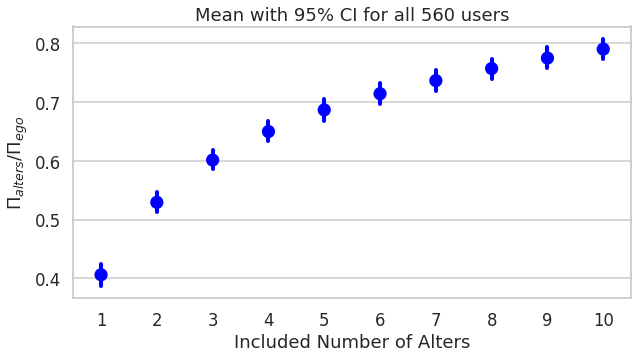

In [54]:
vs.cv_plot(user_info[user_info['n_meetupers_x'] >=10], threshold=10, plot_type='errorbar', mode='talk', l=10, w=5)

## True friendship network

In [69]:
df_friend=pd.read_csv('results/user-meetup-all-None-sorted-TrueNet.csv')
df_friend

,userid_x,userid_y,meetup,N_previous,group_x,group_y,Included Rank,Weight,alter_info,CE_alter,...,CCE_ego_alters,Pi_alter,Pi_alters,Pi_ego_alter,Pi_ego_alters,n_meetupers_x,ego_info,LZ_entropy,Pi,n_meetupers_y
0,00-a,hironao,2.0,282,helpful,helpful,1,128,5.554589,5.571624,...,3.803740,0.248851,0.248851,0.556313,0.556313,2,6.357552,3.965021,0.531858,2
1,00-a,qiring,1.0,284,helpful,helpful,2,138,6.266787,5.621598,...,3.735703,0.238229,0.377894,0.549886,0.566474,2,6.357552,3.965021,0.531858,2
2,01,gregor-van-der-mark,0.0,319,useless,useless,1,9,6.491853,8.172622,...,4.838979,-0.072653,-0.072653,0.500099,0.500099,2,7.686501,4.857715,0.497657,2
3,01,ju,0.0,257,helpful,helpful,2,34,5.554589,7.489608,...,4.750159,0.074561,0.088127,0.509437,0.511614,2,7.686501,4.857715,0.497657,2
4,08,kolya-miller,0.0,865,useless,useless,1,141,7.876517,9.384551,...,3.822733,-0.038350,-0.038350,0.680053,0.680053,3,9.124121,3.842487,0.678117,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68442,zvi-band,justin-thorp,0.0,1320,helpful,helpful,2,124,8.479780,6.787811,...,2.084604,0.019443,0.102751,0.798936,0.799270,4,6.794416,1.756565,0.835931,4
68443,zvi-band,david-troy,0.0,718,useless,useless,3,4,8.308339,9.331662,...,2.084143,-0.347722,0.105616,0.834219,0.799323,4,6.794416,1.756565,0.835931,4
68444,zvi-band,ben-kutil,0.0,360,useless,useless,4,3,7.665336,8.386582,...,2.082332,-0.226710,0.109007,0.835705,0.799529,4,6.794416,1.756565,0.835931,4
68445,zwilling,danielle-maveal,0.0,313,useless,useless,1,0,7.707359,NaN,...,4.300389,NaN,NaN,0.516865,0.516865,2,6.845490,4.300389,0.516865,2


In [67]:
df_friend[df_friend['group_x'] =='helpful']

,userid_x,userid_y,meetup,N_previous,group_x,group_y,Included Rank,Weight,alter_info,CE_alter,...,CCE_ego_alters,Pi_alter,Pi_alters,Pi_ego_alter,Pi_ego_alters,n_meetupers_x,ego_info,LZ_entropy,Pi,n_meetupers_y
0,00-a,hironao,2.0,282,helpful,helpful,1,128,5.554589,5.571624,...,3.803740,0.248851,0.248851,0.556313,0.556313,2,6.357552,3.965021,0.531858,2
1,00-a,qiring,1.0,284,helpful,helpful,2,138,6.266787,5.621598,...,3.735703,0.238229,0.377894,0.549886,0.566474,2,6.357552,3.965021,0.531858,2
3,01,ju,0.0,257,helpful,helpful,2,34,5.554589,7.489608,...,4.750159,0.074561,0.088127,0.509437,0.511614,2,7.686501,4.857715,0.497657,2
5,08,aaron-wallis,0.0,582,helpful,helpful,2,114,7.774787,8.899646,...,3.806077,0.060396,0.018274,0.679928,0.681683,3,9.124121,3.842487,0.678117,3
8,12,uzu,0.0,237,helpful,helpful,2,225,5.781360,6.483485,...,2.048758,0.097326,0.064931,0.799972,0.800882,2,6.686501,2.107335,0.794110,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68437,zulfan-tm,dita-sabila,59.0,759,helpful,helpful,4,354,7.499846,6.992744,...,3.666772,0.162485,0.530098,0.598568,0.640772,7,7.592457,4.113363,0.586663,7
68438,zulfan-tm,fathiya-adisza,37.0,294,helpful,helpful,5,308,6.599913,5.897413,...,3.623675,0.345039,0.541305,0.606316,0.645881,7,7.592457,4.113363,0.586663,7
68439,zulfan-tm,luna-fedrafaisya,15.0,627,helpful,helpful,6,482,7.247928,5.925208,...,3.593675,0.340857,0.560935,0.610096,0.649425,7,7.592457,4.113363,0.586663,7
68440,zulfan-tm,bayu-aditya,1.0,208,helpful,helpful,7,205,6.169925,6.350878,...,3.564951,0.274477,0.567198,0.602295,0.652811,7,7.592457,4.113363,0.586663,7


In [ ]:
user_friend = df_friend[['Included Rank','userid_y', 'CCE_alters', 'CCE_ego_alters', 'Pi_alters', 'Pi_ego_alters', 
                                 'LZ_entropy', 'Pi', 'n_meetupers_x', 'n_meetupers_y', 'userid_x']]
user_friend = user_friend.rename({'Included Rank': 'Included', 
                              'userid_x': 'userid',
                             'Pi': 'Pi_ego'}, axis=1)

In [60]:
user_friend['Pi_alters_ratio'] = user_friend['Pi_alters'] / user_friend['Pi_ego'] 
user_friend['Pi_ego_alters_ratio'] = user_friend['Pi_ego_alters'] / user_friend['Pi_ego'] 

In [61]:
user_friend

,Included,userid_y,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,LZ_entropy,Pi_ego,n_meetupers_x,n_meetupers_y,userid,Pi_alters_ratio,Pi_ego_alters_ratio
0,1,hironao,5.571624,3.803740,0.248851,0.556313,3.965021,0.531858,2,2,00-a,0.467890,1.045980
1,2,qiring,4.900599,3.735703,0.377894,0.566474,3.965021,0.531858,2,2,00-a,0.710517,1.065085
2,1,gregor-van-der-mark,8.172622,4.838979,-0.072653,0.500099,4.857715,0.497657,2,2,01,-0.145990,1.004907
3,2,ju,7.432897,4.750159,0.088127,0.511614,4.857715,0.497657,2,2,01,0.177084,1.028045
4,1,kolya-miller,9.384551,3.822733,-0.038350,0.680053,3.842487,0.678117,3,3,08,-0.056554,1.002855
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68442,2,justin-thorp,6.562225,2.084604,0.102751,0.799270,1.756565,0.835931,4,4,zvi-band,0.122918,0.956144
68443,3,david-troy,6.551689,2.084143,0.105616,0.799323,1.756565,0.835931,4,4,zvi-band,0.126345,0.956207
68444,4,ben-kutil,6.539058,2.082332,0.109007,0.799529,1.756565,0.835931,4,4,zvi-band,0.130402,0.956454
68445,1,danielle-maveal,NaN,4.300389,NaN,0.516865,4.300389,0.516865,2,2,zwilling,NaN,1.000000


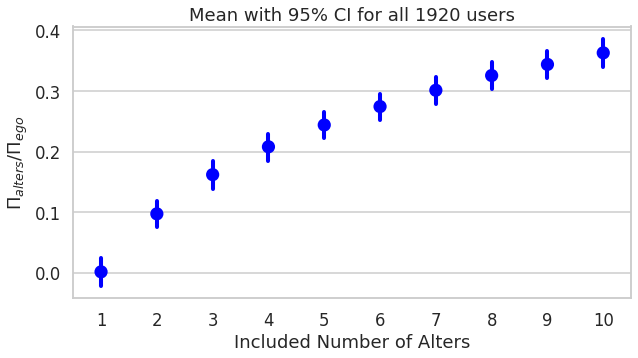

In [65]:
vs.cv_plot(user_friend[user_friend['n_meetupers_x'] >=10], threshold=10, plot_type='errorbar', mode='talk', l=10, w=5)

## True Friend network, only good friends

In [70]:
df_friend_good = pd.read_csv('results/user-meetup-all-None-TrueNet-sorted-Good.csv')

In [71]:
user_friend_good = df_friend_good[['Included Rank','userid_y', 'CCE_alters', 'CCE_ego_alters', 'Pi_alters', 'Pi_ego_alters', 
                                 'LZ_entropy', 'Pi', 'n_meetupers_x', 'n_meetupers_y', 'userid_x']]
user_friend_good = user_friend_good.rename({'Included Rank': 'Included', 
                              'userid_x': 'userid',
                             'Pi': 'Pi_ego'}, axis=1)

In [72]:
user_friend_good['Pi_alters_ratio'] = user_friend_good['Pi_alters'] / user_friend_good['Pi_ego'] 
user_friend_good['Pi_ego_alters_ratio'] = user_friend_good['Pi_ego_alters'] / user_friend_good['Pi_ego'] 
user_friend_good

,Included,userid_y,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,LZ_entropy,Pi_ego,n_meetupers_x,n_meetupers_y,userid,Pi_alters_ratio,Pi_ego_alters_ratio
0,1,hironao,5.571624,3.803740,0.248851,0.556313,3.965021,0.531858,2,2,00-a,0.467890,1.045980
1,2,qiring,4.900599,3.735703,0.377894,0.566474,3.965021,0.531858,2,2,00-a,0.710517,1.065085
2,1,ju,7.489608,4.767012,0.074561,0.509437,4.857715,0.497657,1,1,01,0.149824,1.023670
3,1,aaron-wallis,8.899646,3.824012,0.060396,0.679928,3.842487,0.678117,1,1,08,0.089064,1.002670
4,1,uzu,6.483485,2.056654,0.097326,0.799972,2.107335,0.794110,1,1,12,0.122560,1.007382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18727,4,dita-sabila,4.561572,3.666772,0.530098,0.640772,4.113363,0.586663,7,7,zulfan-tm,0.903582,1.092231
18728,5,fathiya-adisza,4.474253,3.623675,0.541305,0.645881,4.113363,0.586663,7,7,zulfan-tm,0.922685,1.100939
18729,6,luna-fedrafaisya,4.319552,3.593675,0.560935,0.649425,4.113363,0.586663,7,7,zulfan-tm,0.956145,1.106982
18730,7,bayu-aditya,4.269715,3.564951,0.567198,0.652811,4.113363,0.586663,7,7,zulfan-tm,0.966821,1.112752


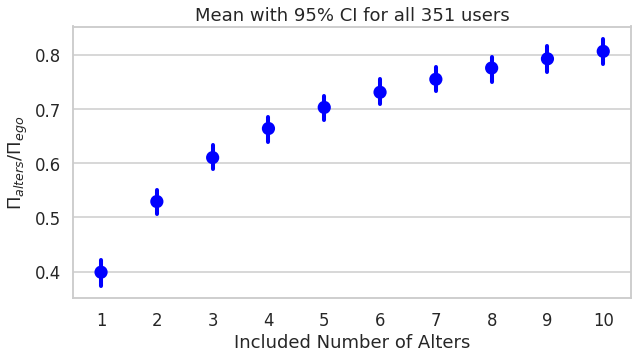

In [73]:
vs.cv_plot(user_friend_good[user_friend_good['n_meetupers_x'] >=10], threshold=10, plot_type='errorbar', mode='talk', l=10, w=5)

## Compare for them, different egos for both networks

In [89]:
user_info['category'] = 'Meetup Friendship'
user_friend_good['category'] = 'True Friendship'

In [113]:
print(user_info[user_info['n_meetupers_x'] >=10]['userid'].nunique(), 
      user_friend_good[user_friend_good['n_meetupers_x']>=10]['userid'].nunique())

560 351


In [114]:
print(user_info['userid'].nunique(), user_friend_good['userid'].nunique())

4436 4930


In [91]:
both_network = pd.concat([user_friend_good, user_info])

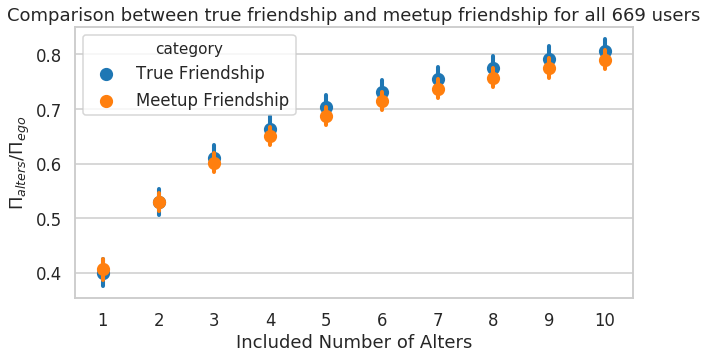

In [100]:
vs.cv_compare_plot(both_network[both_network['n_meetupers_x'] >=10], threshold=10, mode='talk', l=10, w=5)

## Same egos are these dataset

In [117]:
share_users = list(set(user_info['userid'].tolist()) & set(user_friend_good['userid'].tolist()) )
len(share_users)

4018

In [118]:
share_users = list(set(user_info[user_info['n_meetupers_x'] >=10]['userid'].tolist()) & 
                   set(user_friend_good[user_friend_good['n_meetupers_x']>=10]['userid'].tolist()) )
len(share_users)

242

In [119]:
share_network = pd.concat([user_friend_good[user_friend_good['userid'].isin(share_users)], 
                           user_info[user_info['userid'].isin(share_users)]])
share_network['userid'].nunique()

242

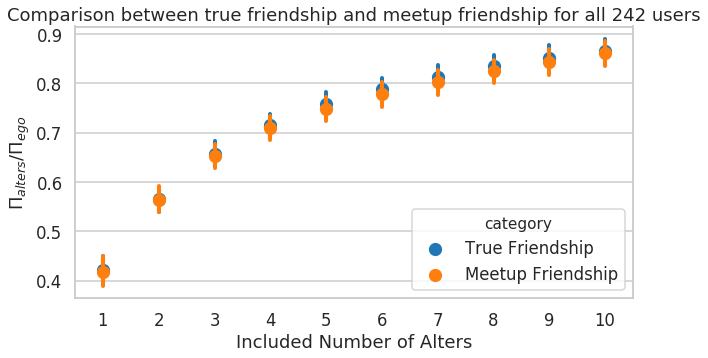

In [120]:
# vs.cv_compare_plot(share_network[share_network['n_meetupers_x'] >=10], threshold=10, mode='talk', l=10, w=5)
vs.cv_compare_plot(share_network, threshold=10, mode='talk', l=10, w=5)

In [121]:
share_network[share_network['n_meetupers_x'] >=10]['userid'].nunique()

242

In [122]:
share_network[share_network['n_meetupers_x'] ==10]['userid'].unique()

array(['adam-ostrow', 'anita-brooklynbybike-singh', 'chuck-masucci',
       'geoff-wood', 'hugh', 'istvan-busak', 'jason-liszka', 'jp-kim',
       'kelly-sutton', 'kibbe', 'lindsey-lanpher', 'marcelino-alvarez',
       'nate-bolt', 'nathan-archambault', 'peter-kim', 'rob-fishman',
       'senator-john-blutarski', 'suzanne-marlatt', 'toby-padilla',
       'andrew-grill', 'brady-forrest', 'enrico-gatti', 'ernie-hsiung',
       'geoff-kim', 'michael-kantrow', 'nico-lumma', 'peter-cortez',
       'unityan'], dtype=object)

In [123]:
share_network[share_network['userid'] == 'hugh']

,Included,userid_y,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,LZ_entropy,Pi_ego,n_meetupers_x,n_meetupers_y,userid,Pi_alters_ratio,Pi_ego_alters_ratio,category
7154,1,john-decicco,8.330993,6.352647,0.075962,0.371739,6.59384,0.340584,10,10,hugh,0.223036,1.091475,True Friendship
7155,2,alli,7.544890,6.206208,0.208140,0.390285,6.59384,0.340584,10,10,hugh,0.611127,1.145928,True Friendship
7156,3,meghan-keane,7.275235,6.168182,0.247599,0.395058,6.59384,0.340584,10,10,hugh,0.726982,1.159942,True Friendship
7157,4,chet-gulland,7.069114,6.073265,0.276620,0.406897,6.59384,0.340584,10,10,hugh,0.812194,1.194704,True Friendship
7158,5,christine-huang,6.933556,6.021983,0.295252,0.413251,6.59384,0.340584,10,10,hugh,0.866899,1.213359,True Friendship
7159,6,kristen-vang,6.907249,6.006161,0.298830,0.415205,6.59384,0.340584,10,10,hugh,0.877403,1.219097,True Friendship
7160,7,john-hamilton,6.779752,5.936520,0.316003,0.423774,6.59384,0.340584,10,10,hugh,0.927826,1.244255,True Friendship
7161,8,jordan-spak,6.761242,5.922904,0.318474,0.425443,6.59384,0.340584,10,10,hugh,0.935081,1.249156,True Friendship
7162,9,toby-daniels,6.743398,5.911125,0.320851,0.426885,6.59384,0.340584,10,10,hugh,0.942061,1.253391,True Friendship
7163,10,meg-robertson,6.707389,5.907269,0.325633,0.427357,6.59384,0.340584,10,10,hugh,0.956101,1.254776,True Friendship


In [125]:
share_network[share_network['userid'] == 'hugh']['userid_y'].nunique()

15

In [126]:
len(share_network[share_network['userid'] == 'hugh']['userid_y'])

20

In [136]:
(len(share_network[share_network['userid'] == 'hugh']['userid_y'])- share_network[share_network['userid'] == 'hugh']['userid_y'].nunique())

5

In [197]:
import util

In [201]:
df_similarity = util.network_similarity(share_network)

In [169]:
import matplotlib.pyplot as plt

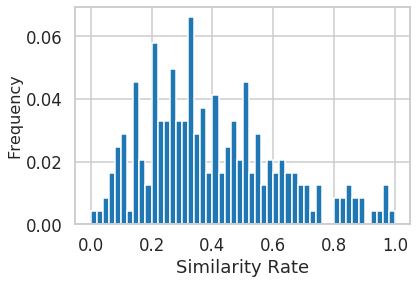

In [202]:
weights = np.ones_like(np.array(df_similarity['similarity_rate']))/float(len(np.array(df_similarity['similarity_rate'])))

plt.hist(df_similarity['similarity_rate'],weights=weights,bins = 50)
plt.xlabel('Similarity Rate', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.show()

## Check how many same locations in both network

In [190]:
# read picle file
pickle_in = open("n_previous_placeidT.pickle", "rb")
placeidT = pickle.load(pickle_in)
pickle_in.close()

In [233]:
placeid_set = {id:set(placeidT[id]['placeid'].tolist()) for id in placeidT.keys()}

**Co-Distinct-Location rate is define as len(ego_unique_placeid  & alter_unique_placeid) / len(ego_unique_placeid)**

In [236]:
share_network['Co-Dist-Loc-rate'] = share_network.apply(lambda row: 
                                                        util.co_location_rate(row.userid, row.userid_y, placeid_set), axis=1)

In [238]:
share_network

,Included,userid_y,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,LZ_entropy,Pi_ego,n_meetupers_x,n_meetupers_y,userid,Pi_alters_ratio,Pi_ego_alters_ratio,category,Co-Dist-Loc-rate
73,1,ed-kohler,8.253134,6.299618,0.208899,0.440958,6.478684,0.421275,26,26,aaron-landry,0.495873,1.046721,True Friendship,0.298343
74,2,ang-dezelske,7.779926,6.180097,0.269376,0.453958,6.478684,0.421275,26,26,aaron-landry,0.639430,1.077581,True Friendship,0.151934
75,3,brian-moen,7.168999,6.036843,0.342854,0.469402,6.478684,0.421275,26,26,aaron-landry,0.813848,1.114239,True Friendship,0.219613
76,4,taylor-carik,7.033814,5.968892,0.358556,0.476675,6.478684,0.421275,26,26,aaron-landry,0.851121,1.131505,True Friendship,0.158840
77,5,james-l,6.863904,5.895402,0.378043,0.484505,6.478684,0.421275,26,26,aaron-landry,0.897377,1.150091,True Friendship,0.127072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27988,128,sami-promisloff,5.449807,4.794005,0.529328,0.596085,6.124965,0.457669,132,132,zachary-blank,1.156574,1.302436,Meetup Friendship,0.062411
27989,129,sarah-g,5.449185,4.793493,0.529393,0.596136,6.124965,0.457669,132,132,zachary-blank,1.156715,1.302547,Meetup Friendship,0.015603
27990,130,daniel-rhodes,5.448308,4.792771,0.529484,0.596208,6.124965,0.457669,132,132,zachary-blank,1.156914,1.302705,Meetup Friendship,0.018440
27991,131,jenna-langer,5.447415,4.792037,0.529576,0.596281,6.124965,0.457669,132,132,zachary-blank,1.157116,1.302865,Meetup Friendship,0.015603


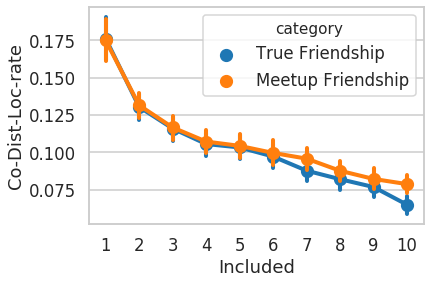

In [237]:
sns.pointplot(x="Included", y="Co-Dist-Loc-rate", 
              data=share_network[share_network['Included'] <= 10], 
              hue='category', ci=95, join='False')